# Análisis Exploratorio de Datos (EDA)

Este notebook está diseñado para realizar un **Análisis Exploratorio de Datos (EDA)** del proyecto **ML_stems_predict**. El objetivo principal es explorar, comprender y visualizar las características del conjunto de datos, asegurando la calidad de los mismos e identificando patrones relevantes.

El análisis incluye:
1. **Revisión de calidad de datos**: Identificación de valores nulos, duplicados y tipos de datos.
2. **Estadísticas descriptivas**: Resumen numérico de las variables.
3. **Visualización de datos**: Análisis gráfico de distribuciones, relaciones y tendencias.
4. **Análisis temporal**: Identificación de patrones en el tiempo.

Este proceso servirá como base para análisis posteriores y modelos predictivos, garantizando una comprensión clara de los datos disponibles.

In [24]:
# Importa las librerias para el analisis exploratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# configura el estilo de los graficos
sns.set(style="whitegrid")

In [25]:

# Verifica si el archivo existe en la ruta especificada
file_path = r'C:\Users\User\Desktop\ML_stems_predict\data\processed\merged_clean.csv'
if os.path.exists(file_path):
    print("El archivo existe")
else:
    print(f"El archivo no se encuentra en la ruta especificada: {file_path}")


El archivo existe


## 1. Revisión inicial
  1. Comprender los datos:
- Entender qué representan las columnas de tu dataset y cuál es el objetivo del análisis.

In [26]:
df = pd.read_csv(file_path) 
print(df.head())
print(df.info())

         Flower     Color  Stems  Year  Month  Day
0  Alstroemeria  Assorted    372  2021      3   21
1  Alstroemeria  Assorted    480  2021      6    9
2  Alstroemeria  Assorted    120  2022      8    3
3  Alstroemeria  Assorted     50  2022     12   30
4  Alstroemeria  Assorted    550  2023      3   30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267964 entries, 0 to 267963
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Flower  267964 non-null  object
 1   Color   267964 non-null  object
 2   Stems   267964 non-null  int64 
 3   Year    267964 non-null  int64 
 4   Month   267964 non-null  int64 
 5   Day     267964 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 12.3+ MB
None


2.Identifica problemas en los datos:

In [27]:
# Buscar valores nulos
print(df.isnull().sum())

Flower    0
Color     0
Stems     0
Year      0
Month     0
Day       0
dtype: int64


2. Limpieza de datos
Manejo de valores nulos:

In [28]:
# Buscar valores duplicados
print(df.duplicated().sum())

0


3. Vrificar de que los tipos de datos sean correctos:

In [29]:
# verificar que los datos sea correctos
df['Year'] = df['Year'].astype(int)

## 3. Análisis descriptivo

1.Estadísticas básicas:
   - Para obtener una visión general de las métricas clave (media, mediana, etc.).
   
2.Distribuciones:
   - Visualizar la distribución de cada variable numérica con un histogramas:

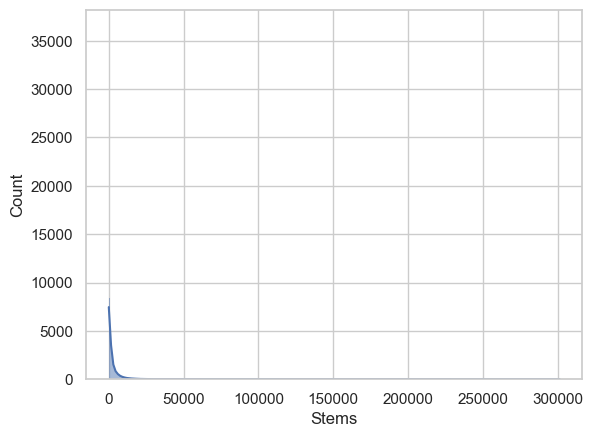

In [30]:
sns.histplot(df['Stems'], kde=True)
plt.show()

In [31]:
df.describe()

,Stems,Year,Month,Day
count,267964.000000,267964.000000,267964.000000,267964.000000
mean,2704.838851,2022.569595,6.596028,15.773902
std,5593.204303,1.122793,3.421839,8.803401
min,0.000000,2021.000000,1.000000,1.000000
25%,216.000000,2022.000000,4.000000,8.000000
50%,906.000000,2023.000000,7.000000,16.000000
75%,2871.000000,2024.000000,10.000000,23.000000
max,301415.000000,2024.000000,12.000000,31.000000


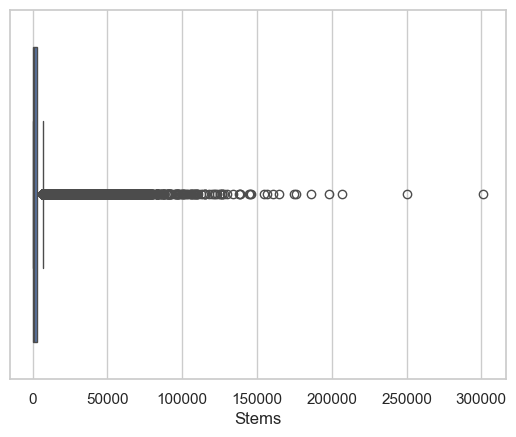

In [32]:
df['Stems'].describe()
sns.boxplot(x=df['Stems'])
plt.show()

3. Valores únicos:

In [33]:
print(f"Valores únicos en 'Flower': {df['Flower'].nunique()}")
print(f"Valores únicos en 'Color': {df['Color'].nunique()}")

Valores únicos en 'Flower': 96
Valores únicos en 'Color': 95


4. Visualización

 1.Distribución de datos:
  - Diagramas de barras para frecuencia en variables categóricas:

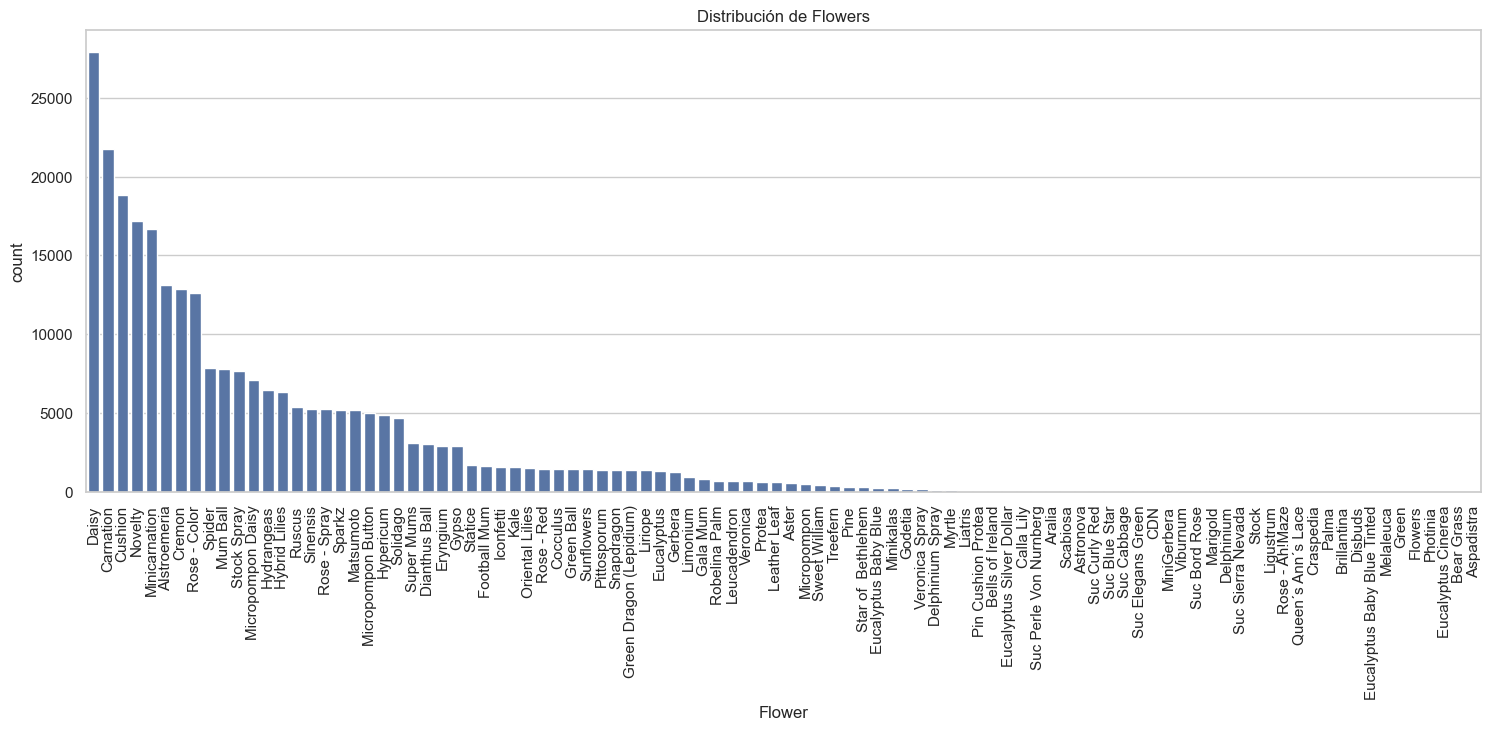

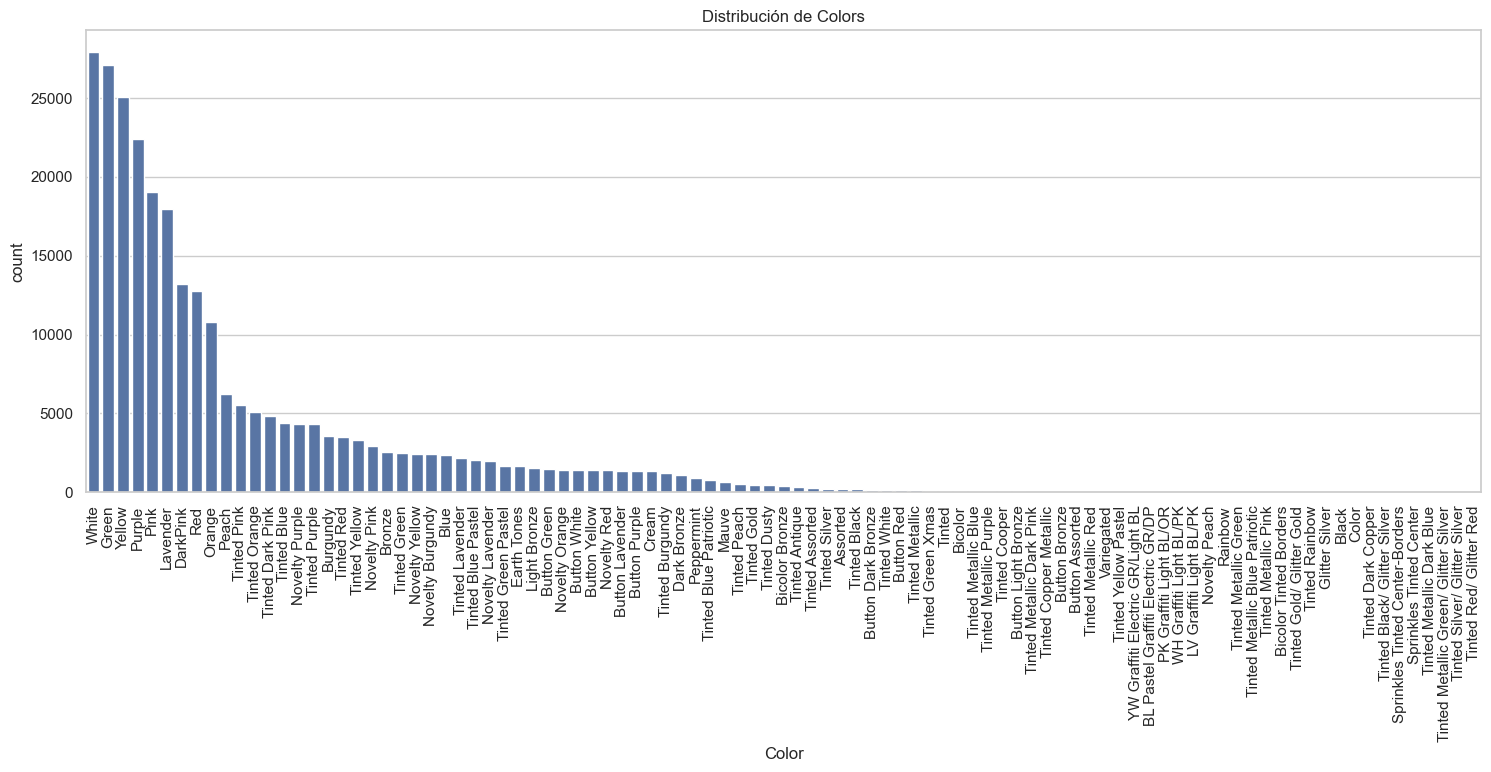

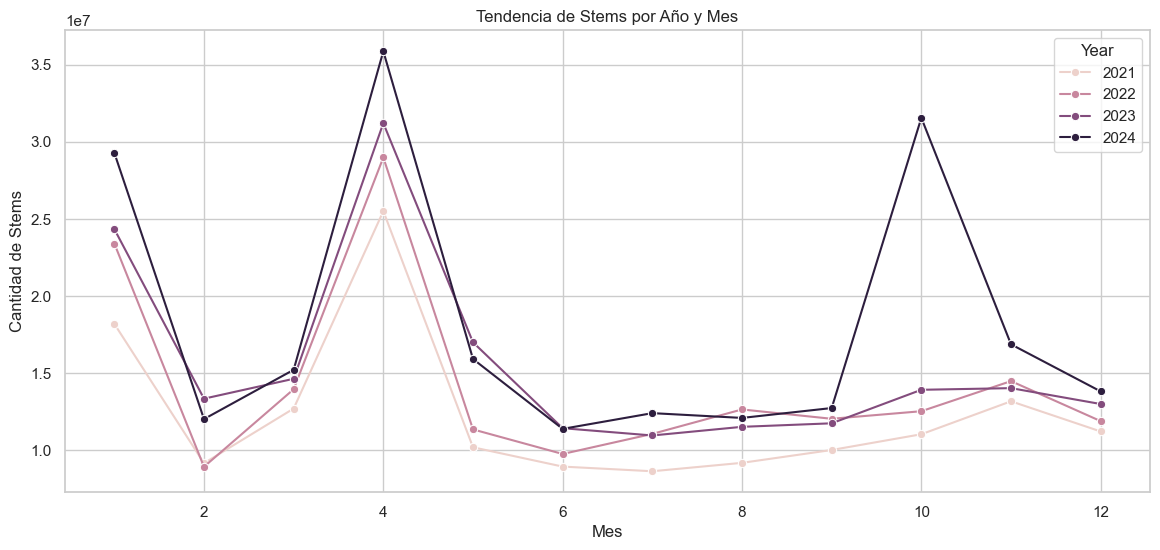

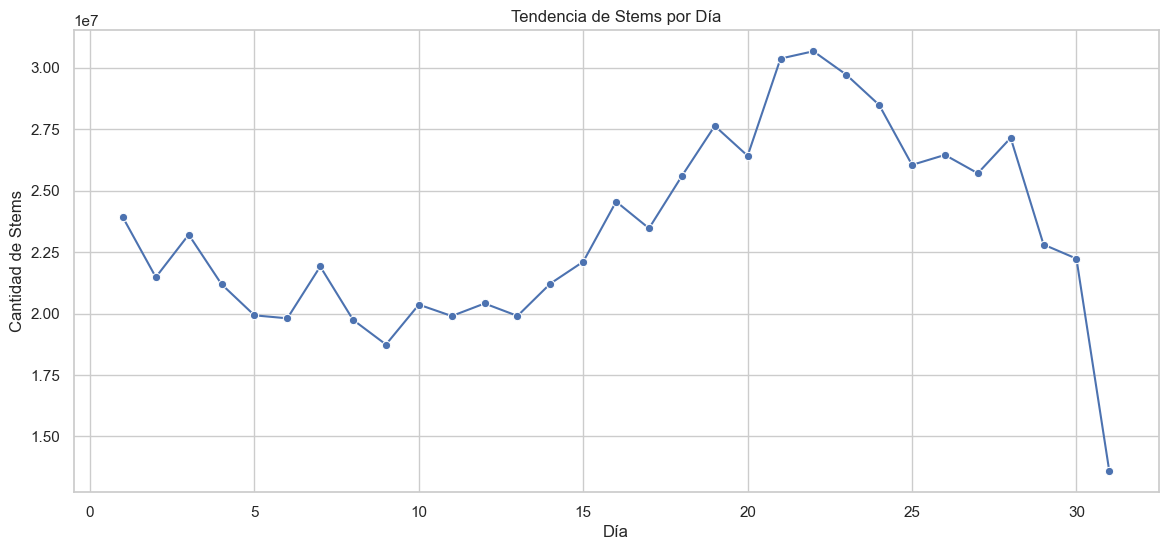

In [34]:
# Cargar el dataframe desde el archivo si no está definido
if 'df' not in locals():
	df = pd.read_csv(file_path)

# Visualización de la distribución de "Flower" y "Color" (frecuencia)
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='Flower', order=df['Flower'].value_counts().index)
plt.title('Distribución de Flowers')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='Color', order=df['Color'].value_counts().index)
plt.title('Distribución de Colors')
plt.xticks(rotation=90)
plt.show()

# Analizar las tendencias a lo largo del tiempo (Año, Mes, Día)
plt.figure(figsize=(14, 6))
sns.lineplot(data=df.groupby(['Year', 'Month'])['Stems'].sum().reset_index(), x='Month', y='Stems', hue='Year', marker='o')
plt.title('Tendencia de Stems por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Stems')
plt.show()

# Tendencia de "Stems" a lo largo de los días (por si hay algún patrón estacional)
plt.figure(figsize=(14, 6))
sns.lineplot(data=df.groupby('Day')['Stems'].sum().reset_index(), x='Day', y='Stems', marker='o')
plt.title('Tendencia de Stems por Día')
plt.xlabel('Día')
plt.ylabel('Cantidad de Stems')
plt.show()

2. Relaciones entre variables:

- Gráfico de dispersión para variables numéricas:

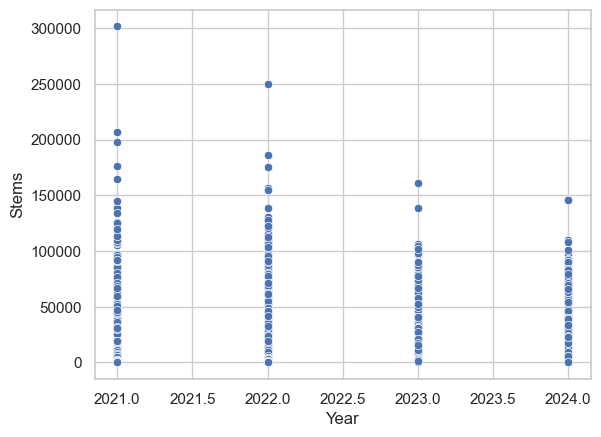

In [35]:
sns.scatterplot(data=df, x='Year', y='Stems')
plt.show()

3. Mapa de calor de correlaciones:

  - Visualización de correlación entre variables numéricas

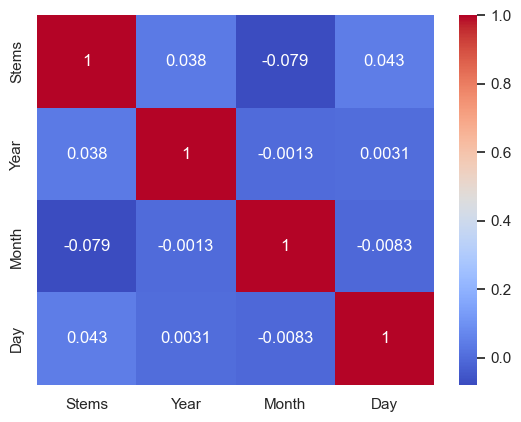

In [36]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 5. Análisis temporal

Convertir a formato de fecha:

- Asegurarse de tener una columna de fecha combinada:

In [37]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

### Conclusiones del Análisis Exploratorio de Datos

Con base en la ejecución del análisis exploratorio, se derivan las siguientes conclusiones:

1. Calidad de los datos:

Se constató la ausencia de valores nulos en la totalidad de las columnas que componen el conjunto de datos.
No se identificaron registros duplicados a lo largo del conjunto de datos.

La consistencia de los tipos de datos fue verificada, y estos se consideran apropiados para las variables representadas.

2. Distribuciones y Estadísticas Descriptivas:

Las variables numéricas, cuentos como 'Stems', exhiben una distribución asimétrica, caracterizada por la presencia de valores extremos. Estos valores atípicos o extremos podrían estar asociados a los picos observados en las tendencias temporales y requieren un análisis más detenido para comprender su origen e impacto.

Las estadísticas descriptivas calculadas confirman una variabilidad considerable en las cantidades registradas en la columna 'Stems', lo cual es coherente con la presencia de asimetría y valores extremos.

3. Tendencias Temporales:

Se lograron identificar patrones temporales discernibles en las cantidades de 'Stems' al analizar su comportamiento a lo largo de los meses y días. Estos patrones incluyen picos y valles notables, que sugieren la existencia de potenciales tendencias estacionales o eventos específicos que causan fluctuaciones significativas.

Se considera que un análisis más exhaustivo de estas dinámicas temporales es crucial. Dicha exploración podría no solo enriquecer significativamente el desarrollo de futuros modelos predictivos, sino también ayudar a contextualizar y posiblemente explicar la ocurrencia de los valores extremos identificados en la distribución general.

4. Relaciones y Correlaciones (Basado en el Mapa de Calor de la Imagen):

El mapa de calor proporcionado ilustra la matriz de correlación lineal entre las variables 'Stems', 'Year', 'Month' y 'Day'.
Se observa que las magnitudes de las correlaciones entre estas variables son consistentemente bajas, con valores muy cercanos a cero.
Esto indica que, dentro de este conjunto específico de variables, no existe una relación lineal fuerte entre la cantidad de 'Stems' y el tiempo (Año, Mes, Día), ni entre las componentes temporales entre sí.

Por lo tanto, este mapa de calor en particular no revela problemas de multicolinealidad significativa entre 'Stems', 'Year', 'Month' y 'Day', y la utilidad para la reducción de dimensionalidad o selección de características basada en estas correlaciones es limitada.

5. Visualización y Variables Categóricas:

El conjunto de datos comprende un total de 96 valores únicos para la columna 'Flower' y 95 para la columna 'Color'.

La visualización de estas variables categóricas sugiere una distribución sesgada, evidenciando una mayor representación de determinadas categorías sobre otras.

'Flower' y 'Color' tienen muchos valores únicos (alta cardinalidad) y distribuciones sesgadas individualmente. Para saber si hay una relación entre ellas, es decir, si ciertos tipos de flor tienden a tener ciertos colores, sería necesario realizar el análisis de asociación categórica (tablas de contingencia, prueba Chi-cuadrado, etc.).

Conclusión general:

Las observaciones recopiladas durante la fase de análisis exploratorio, particularmente la relación potencial entre los picos temporales y los valores extremos de la distribución , proporcionan una base de conocimiento robusta y fundamentada. Esta base es esencial para la planificación y ejecución de etapas subsiguientes del proyecto, incluyendo la potencial depuración adicional de datos si se considera necesaria (quizás enfocada en los extremos), la construcción de modelos predictivos informados (considerando la estacionalidad) y la ejecución de análisis de patrones específicos con un mayor nivel de detalle.